In [15]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

import pandas as pd

torch.__version__  # Ensure PyTorch is available

'2.9.1+cu126'

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [17]:
url = "https://raw.githubusercontent.com/LeakyAI/FirstNeuralNet/main/lemons.csv"
df = pd.read_csv(url)

In [18]:
df.head()

,Weekend,Sunny,Warm,BigSign,Price,NumberSold
0,1,0,0,1,9,71
1,1,1,1,0,10,137
2,0,1,0,0,10,0
3,1,0,0,1,6,107
4,1,0,0,1,8,80


In [19]:
df.shape

(365, 6)

In [20]:
numsoldmean = df["NumberSold"].mean()
numsoldstd = df["NumberSold"].std()
df["NumberSold"] = (df["NumberSold"] - numsoldmean) / numsoldstd

pricemean = df["Price"].mean()
pricestd = df["Price"].std()
df["Price"] = (df["Price"] - pricemean) / pricestd

In [21]:
df.head()

,Weekend,Sunny,Warm,BigSign,Price,NumberSold
0,1,0,0,1,0.846650,-0.023669
1,1,1,1,0,1.452587,0.743734
2,0,1,0,0,1.452587,-0.849208
3,1,0,0,1,-0.971158,0.394915
4,1,0,0,1,0.240714,0.080977


In [22]:
inputs = ['Weekend', 'Sunny', 'Warm', 'BigSign', 'Price']
x = torch.tensor(df[inputs].values).float().to(device)
y = torch.tensor(df['NumberSold'].values).float().to(device)

In [23]:
x

tensor([[ 1.0000,  0.0000,  0.0000,  1.0000,  0.8467],
        [ 1.0000,  1.0000,  1.0000,  0.0000,  1.4526],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.4526],
        ...,
        [ 1.0000,  0.0000,  0.0000,  1.0000,  0.8467],
        [ 0.0000,  0.0000,  1.0000,  1.0000,  1.4526],
        [ 0.0000,  0.0000,  1.0000,  0.0000, -0.9712]], device='cuda:0')

In [24]:
y

tensor([-0.0237,  0.7437, -0.8492,  0.3949,  0.0810,  0.4298,  1.0926, -0.8492,
         0.5926,  0.2554, -0.8492, -0.8492, -0.8492, -0.8492, -0.8492, -0.8492,
        -0.0934,  0.2205, -0.2678, -0.8492,  1.6507, -0.8492, -0.8492, -0.0237,
         0.2786,  0.1159,  0.4298, -0.8492,  0.2205, -0.8492, -0.8492,  0.6623,
         0.7437, -0.8492, -0.8492, -0.8492, -0.8492,  0.8135,  0.4065, -0.0934,
         1.3600,  1.6739,  0.2786, -0.8492, -0.8492, -0.8492,  0.2205, -0.0934,
         1.7088, -0.8492,  0.0810,  0.8949, -0.8492, -0.8492, -0.8492, -0.8492,
         2.1971,  0.8019, -0.8492, -0.8492,  1.3600,  0.4065, -0.8492,  2.0227,
         0.6623,  1.3600, -0.8492,  0.2554,  0.2205,  0.8019,  0.2554, -0.8492,
         0.4298,  2.0227, -0.8492,  0.0228, -0.8492, -0.8492, -0.8492, -0.8492,
        -0.8492, -0.8492, -0.8492,  1.6507, -0.8492,  0.4298,  0.8949, -0.8492,
        -0.8492,  0.2554, -0.8492, -0.8492, -0.8492, -0.0237, -0.8492,  0.6623,
        -0.8492, -0.8492,  0.8135,  0.67

In [25]:
model = nn.Sequential(
    nn.Linear(in_features=5, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=1)
)

model = model.to(device)

In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.01)

for epoch in range(500):   

    total_loss = 0.0
    for i in range(len(x)):
        inputs = x[i]  # Add batch dimension
        labels = y[i]  # Add batch and output dimensions

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/5, Loss: {total_loss/len(x):.4f}')

Epoch [1/5, Loss: 0.0152
Epoch [2/5, Loss: 0.0089
Epoch [3/5, Loss: 0.0090
Epoch [4/5, Loss: 0.0090
Epoch [5/5, Loss: 0.0083
Epoch [6/5, Loss: 0.0082
Epoch [7/5, Loss: 0.0089
Epoch [8/5, Loss: 0.0082
Epoch [9/5, Loss: 0.0085
Epoch [10/5, Loss: 0.0081
Epoch [11/5, Loss: 0.0085
Epoch [12/5, Loss: 0.0085
Epoch [13/5, Loss: 0.0084
Epoch [14/5, Loss: 0.0080
Epoch [15/5, Loss: 0.0083
Epoch [16/5, Loss: 0.0083
Epoch [17/5, Loss: 0.0082
Epoch [18/5, Loss: 0.0080
Epoch [19/5, Loss: 0.0079
Epoch [20/5, Loss: 0.0078
Epoch [21/5, Loss: 0.0081
Epoch [22/5, Loss: 0.0079
Epoch [23/5, Loss: 0.0078
Epoch [24/5, Loss: 0.0078
Epoch [25/5, Loss: 0.0078
Epoch [26/5, Loss: 0.0083
Epoch [27/5, Loss: 0.0075
Epoch [28/5, Loss: 0.0081
Epoch [29/5, Loss: 0.0078
Epoch [30/5, Loss: 0.0078
Epoch [31/5, Loss: 0.0075
Epoch [32/5, Loss: 0.0075
Epoch [33/5, Loss: 0.0080
Epoch [34/5, Loss: 0.0073
Epoch [35/5, Loss: 0.0075
Epoch [36/5, Loss: 0.0078
Epoch [37/5, Loss: 0.0072
Epoch [38/5, Loss: 0.0074
Epoch [39/5, Loss: 0.

In [ ]:
def graphpredictions(model, x, y, minValue, maxValue):
    model.eval()
    
    predictions = []

    actuals = []
    x.to(device)
    y.to(device)
    model.to(device)

    for i in range(len(x)):

        pred = model(x[i])

        pred = pred*numsoldstd + numsoldmean
        actual = y[i]*numsoldstd + numsoldmean

        predictions.append(pred.item())
        actuals.append(actual.item())

    plt.scatter(range(len(actuals)), actuals, label='Actual', color='green')
    plt.xlabel('actual lemonades sold')
    plt.ylabel('predicted lemonades sold')
    plt.plot([minValue, maxValue], [minValue, maxValue])
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

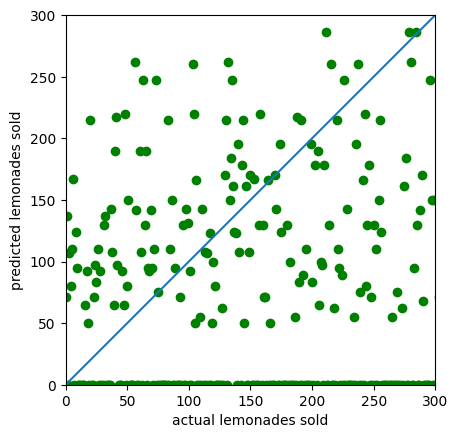

In [ ]:
graphpredictions(model, x, y, minValue=0, maxValue=300)